# Car Price Prediction

In [1]:
#importing the libraries
import numpy as np # numpy used for mathematical operation on array
import pandas as pd # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt # matplotlib used for data visualization
import seaborn as sns # seaborn used for data visualization

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and understanding the data

In [3]:
#Reading the data
cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
#Displaying the first 5 rows
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Displaying the last 5 rows
cars.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
#Shape of the dataset gives the number of rows and columns present
cars.shape

(205, 26)

In [7]:
#Checking for different column present
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
#Checking for data types of different columns present
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
#Info about the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Descriptive Statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
#Descriptive Statistics for categorical variables
cars.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Step 2: Data cleaning and preparation

In [12]:
#Function for finding percentage of missing values in each column
def missing_values_table(data): 
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum()/len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [13]:
missing_values_table(cars)

,Missing Values,% of Total Values
car_ID,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0
wheelbase,0,0.0


**Inference:** Null values absent.

In [14]:
#Looking for no:of unique values in each column
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [15]:
car_name = cars.CarName

In [16]:
# Get the unique values in the CarName column
unique_names = list(car_name.drop_duplicates())

# Print the unique names
print(unique_names)

['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)', 'buick ce

In [17]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
#Diffrent company names present in the column 
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
unique_values = []

# Loop through each element in the column
for value in cars.CompanyName:
    # If the value is not already in the unique_values list, add it
    if value not in unique_values:
        unique_values.append(value)

In [20]:
print(unique_values)

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo']


In [21]:
#Replacing the repeating brand names
cars = cars.replace('maxda','mazda')
cars = cars.replace('porcshce','porsche')
cars = cars.replace('toyouta','toyota')
cars = cars.replace('vokswagen','volkswagen')
cars = cars.replace('vw','volkswagen')

In [22]:
cars.CompanyName.unique()
#Replaced the values

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
# Detect Outliers

def Outliers(df,cols):
  outliers = []
  for c in cols:
    Q1 = df[c].quantile(.25)
    Q3 = df[c].quantile(.75)
    IQR = Q3 - Q1
    step = 1.5*IQR
    df = df[~((df[c] < (Q1 - step)) | (df[c] >  (Q3 + step)))]
    return df

In [24]:
cols = cars.select_dtypes(include = ('int64','float64','int32'))

In [25]:
Outliers(cars,cols)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
# checking for duplicate rows
duplicate = cars[cars.duplicated()]

In [27]:
duplicate

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**Inference:** No duplicate rows detected.

### Step 3: Data visualization

**For categorical variables**

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

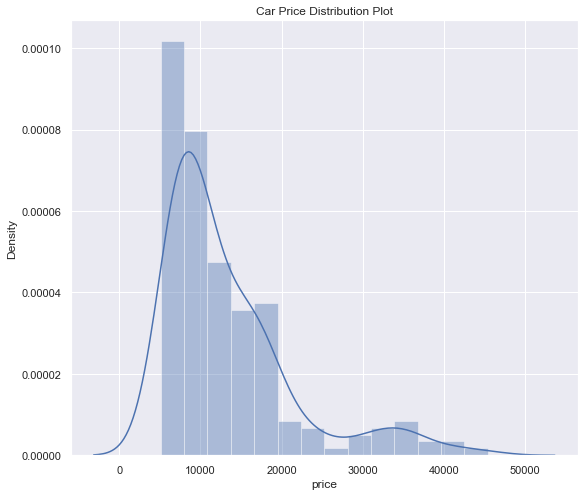

In [28]:
#Distribution plot for price
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

**Inference:** Graph skewed towards right =>most car prices are below 20000.

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

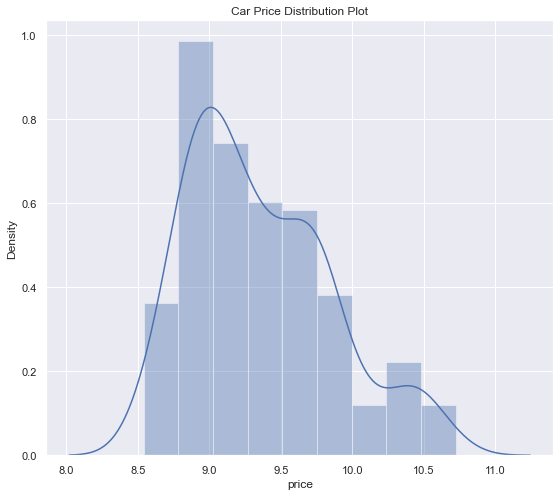

In [29]:
#Log transformation of Distribution plot 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(np.log(cars.price))

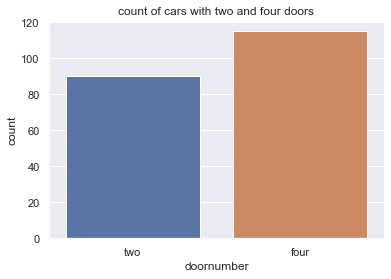

In [30]:
#countplot for doornumber
sns.set_theme(style="darkgrid")
sns.countplot(x ='doornumber', data = cars)
plt.title('count of cars with two and four doors')
 
# Show the plot
plt.show()

**Inference:** Cars with 4 doors are more bought.

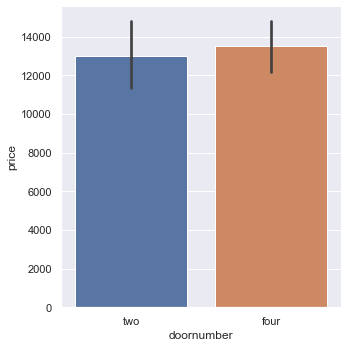

In [31]:
#Price v/s No:of doors
sns.set_theme(style="darkgrid")
sns.catplot(x="doornumber", y="price", kind="bar", data=cars)

**Inference:**Cars with 4 doors are more preferred but no:of doors does not affect the price much.

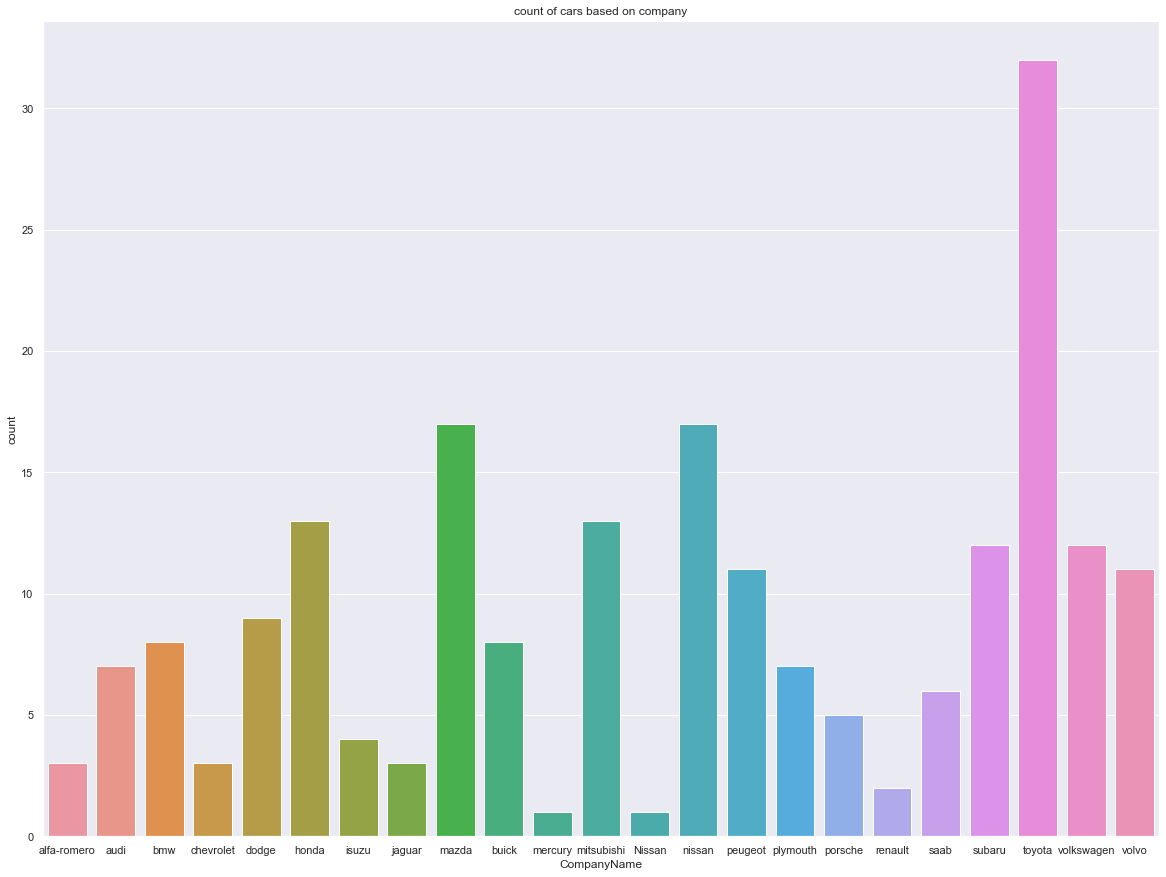

In [32]:
#countplot to understand which companies cars are brought the maximum.
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x ='CompanyName',data = cars,ax=ax )
plt.title('count of cars based on company')

# Show the plot
plt.show()

**Inference:** More cars of company toyota are sold.

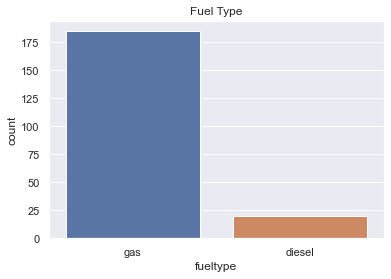

In [33]:
#Countplot for fuel types
sns.set_theme(style="darkgrid")
sns.countplot(x ='fueltype', data = cars)
plt.title('Fuel Type')
plt.show()

**Inference:**More people prefer vehicles run on gas than on diesel.

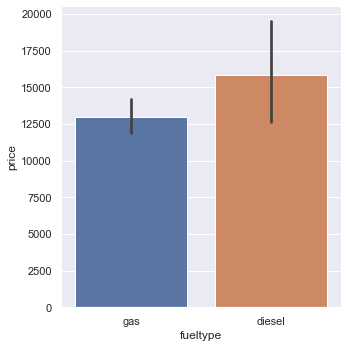

In [34]:
#Fuel price v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="fueltype", y="price", kind="bar", data=cars)

**Inference:** Diesel cars are more expensive.

<AxesSubplot:title={'center':'Engine Type vs Price'}, xlabel='enginetype', ylabel='price'>

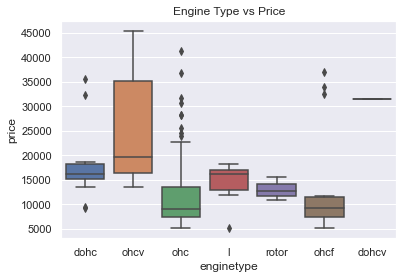

In [35]:
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price)

**Inference:** `ohcv`has higest price range.While `ohc` and `ohcf` are cheapest.

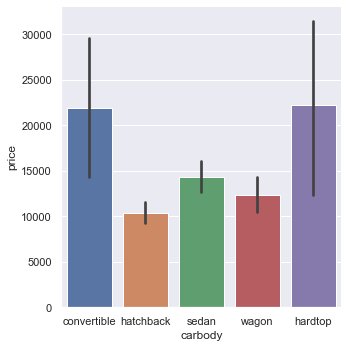

In [36]:
#carbody v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="carbody", y="price", kind="bar", data=cars)

**Inference:** hardtop and convertible are more costly carbodies.

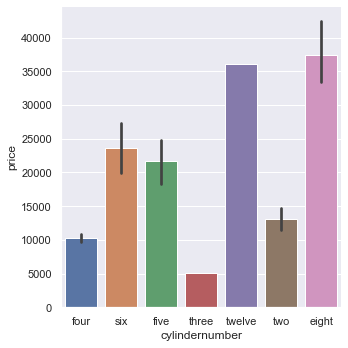

In [37]:
#cylinder v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="cylindernumber", y="price", kind="bar", data=cars)

**Inference:** Cylinder number affects price of car.

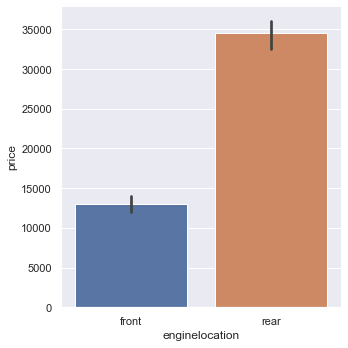

In [38]:
#enginelocation v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="enginelocation", y="price", kind="bar", data=cars)

**Inference:** Enginelocaton affects price of cars.

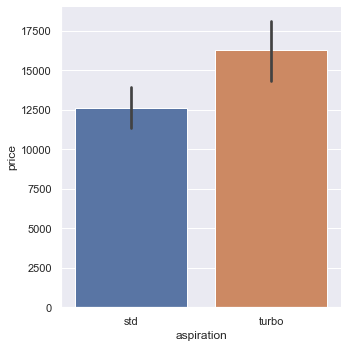

In [39]:
#aspiration v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="aspiration", y="price", kind="bar", data=cars)

**Inference:** aspiration affects price.

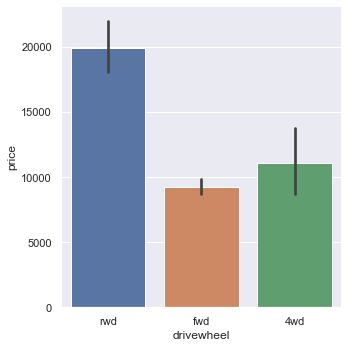

In [40]:
#drivewheel v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="drivewheel", y="price", kind="bar", data=cars)

**Inference:** drivewheel affects price.

<AxesSubplot:title={'center':'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

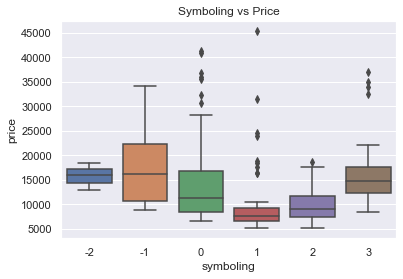

In [41]:
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)

**Inference:** Cars with symboling `-1` seems to be higher priced and there is a dipin prce for cars with symboling `1`.

**For numerical variables**

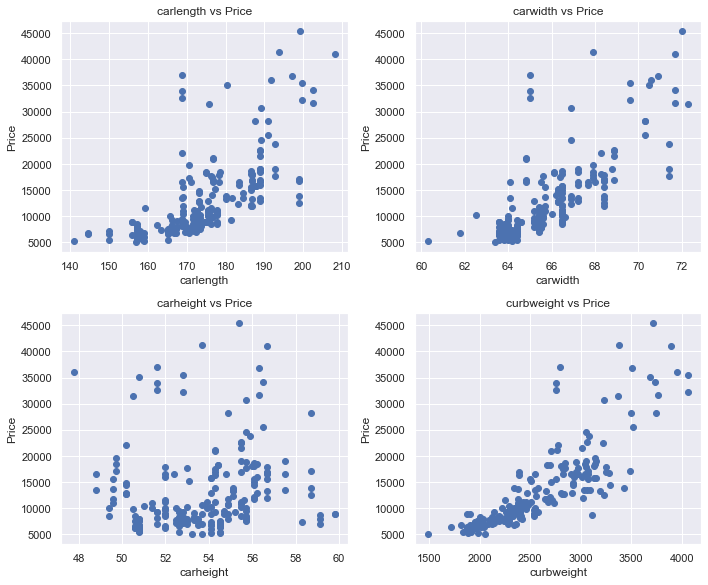

In [42]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


**Inference:** `carlength`,`carwdth`,`curbweight` have a positive correlation with price and `carheight` has a small positive relation with price.

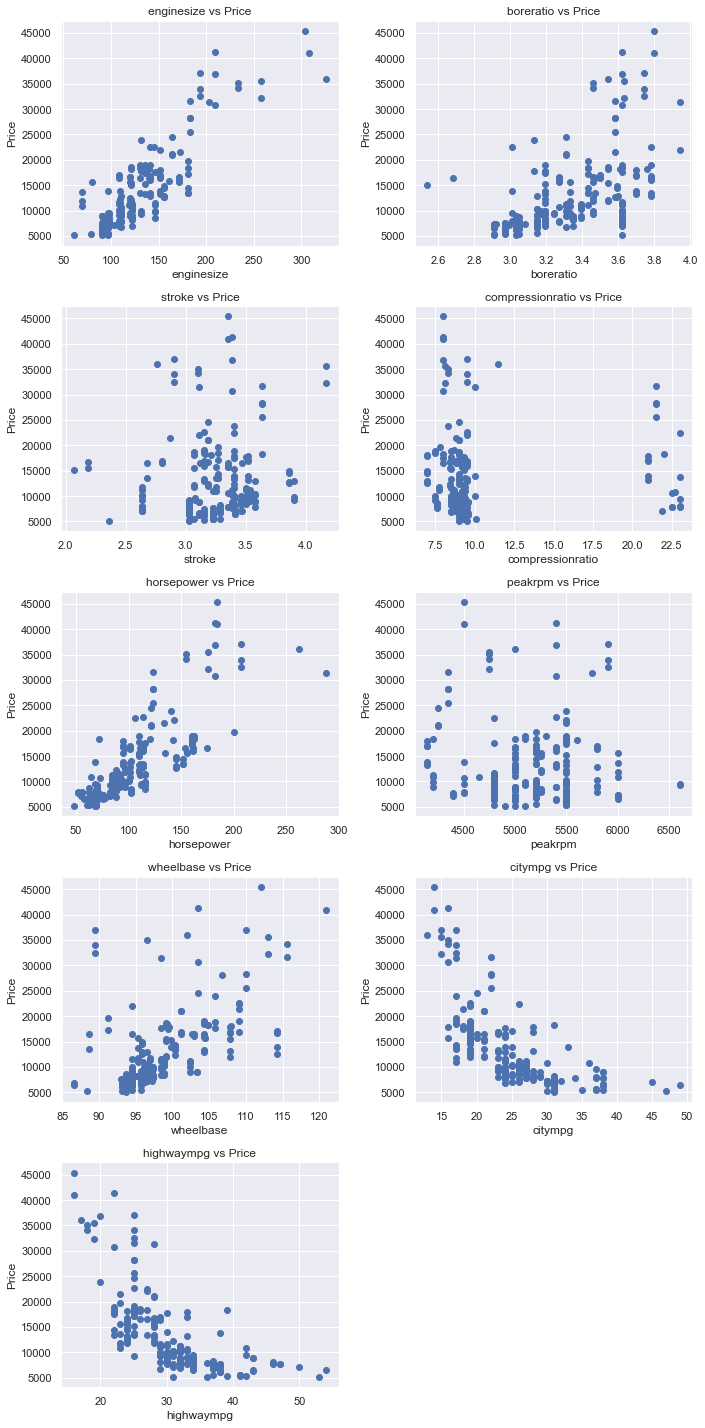

In [43]:
plt.figure(figsize=(10,20))
scatter('enginesize', 1)
scatter('boreratio', 2)
scatter('stroke', 3)
scatter('compressionratio', 4)
scatter('horsepower', 5)
scatter('peakrpm', 6)
scatter('wheelbase', 7)
scatter('citympg', 8)
scatter('highwaympg', 9)
plt.tight_layout()

**Inference:**`compressionratio`,`stroke`,`peakrpm` has no relation with `price`.

**Some features are found to be not important after visual analysis. Those are `carID`,`compressionratio`,`stroke`,`peakrpm`and `doornumber`.**

In [44]:
#Dropping all those columns
cars=cars.drop(['car_ID','compressionratio','stroke','peakrpm','doornumber'],axis=1)

In [45]:
cars.shape

(205, 21)

**Categorical to numerical conversion**

In [46]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars

cars = dummies('fueltype',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('cylindernumber',cars)

In [47]:
cars = dummies('CompanyName',cars)
cars = dummies('enginelocation',cars)

In [48]:
cars = dummies('fuelsystem',cars)

In [49]:
cars.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,...,volkswagen,volvo,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,...,0,0,0,0,0,0,0,1,0,0


### Step 3: Input-output split

In [50]:
cars.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'rear', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [51]:
X = cars[['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight','carheight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'alfa-romero', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'rear',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']]
Y = cars['price']

### Step 4: Test-train split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=1)

### Step 5: Model building

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
#Understanding the best max depth
depth = [];

for i in range(1,8):
    reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = i)
    reg_tree.fit(X_train,np.log(y_train))
    yhat = reg_tree.predict(X_test)
    depth.append(r2_score(np.log(y_test),yhat))
    print("For max depth = ",i, " : ",r2_score(np.log(y_test),yhat))

For max depth =  1  :  0.5796540239987988
For max depth =  2  :  0.8052587878940363
For max depth =  3  :  0.8373806396633171
For max depth =  4  :  0.8374011606045431
For max depth =  5  :  0.858990328135733
For max depth =  6  :  0.8629184437700052
For max depth =  7  :  0.8856772791222793


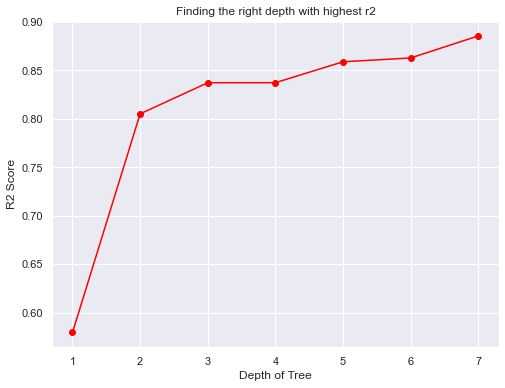

In [55]:
# finding best max depth
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("R2 Score")
plt.title("Finding the right depth with highest r2")
plt.xticks(range(1,8))
plt.show()

**Inference:** r2 maximum when max_depth=7.

In [56]:
# max_depth = 7
reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = 7)
reg_tree.fit(X_train,np.log(y_train))
yhat = reg_tree.predict(X_test)
print('r2 score:',r2_score(np.log(y_test),yhat))
print('MSE:',mean_squared_error(np.log(y_test),yhat))

r2 score: 0.8856772791222793
MSE: 0.026124559528481278


In [57]:
#trainng score
y_hat = reg_tree.predict(X_train)
r2_train = r2_score(np.log(y_train),y_hat)
print('r2 score:',r2_train)
print('MSE:',mean_squared_error(np.log(y_train),y_hat))

r2 score: 0.990253583123987
MSE: 0.0025517106279639035


**Feature Selection**

In [58]:
#Feature selection using RFE
from sklearn.feature_selection import RFE
# create the RFE object and specify the number of features to select
rfe = RFE(reg_tree, n_features_to_select=10)

# fit the RFE object to the data
rfe.fit(X_train, np.log(y_train))

# get the selected features
selected_features = X.columns[rfe.support_].tolist()

In [59]:
selected_features

['wheelbase',
 'carwidth',
 'curbweight',
 'carheight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'hatchback',
 'fwd']

In [60]:
selected_featuress = cars[['wheelbase',
 'carwidth',
 'curbweight',
 'carheight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'hatchback',
 'fwd']]

In [61]:
selected_features_train, selected_features_test, y_selected_features_train, y_selected_features_test = train_test_split(selected_featuress,Y,test_size = 0.33, random_state=1)

**Model with new set of features**

In [62]:
#Understanding the best max depth
depth = [];

for i in range(1,8):
    reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = i)
    reg_tree.fit(selected_features_train,np.log(y_selected_features_train))
    yhat_NEW = reg_tree.predict(selected_features_test)
    depth.append(r2_score(np.log(y_selected_features_test),yhat_NEW))
    print("For max depth = ",i, " : ",r2_score(np.log(y_selected_features_test),yhat_NEW))

For max depth =  1  :  0.5796540239987988
For max depth =  2  :  0.8052587878940358
For max depth =  3  :  0.8373806396633163
For max depth =  4  :  0.8400722071490133
For max depth =  5  :  0.8807856920591967
For max depth =  6  :  0.8638235287607342
For max depth =  7  :  0.8659496562793579


In [63]:
# max_depth = 7
reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = 7)
reg_tree.fit(selected_features_train,np.log(y_selected_features_train))
yhat_new = reg_tree.predict(selected_features_test)
print('r2 score:',r2_score(np.log(y_selected_features_test),yhat_new))
print('MSE:',mean_squared_error(np.log(y_selected_features_test),yhat_new))

r2 score: 0.8659496562793579
MSE: 0.030632635030520553


In [64]:
#training score
y_hat_train_new = reg_tree.predict(selected_features_train)
r2_train_best = r2_score(np.log(y_selected_features_train),y_hat_train_new)
print('r2 score:',r2_train_best)
print('MSE:',mean_squared_error(np.log(y_selected_features_train),y_hat_train_new))

r2 score: 0.989036906471576
MSE: 0.002870248895334078


### Conclusion

In [65]:
# Checking feature importance in the model
reg_tree.feature_importances_

array([0.01512443, 0.01002785, 0.71808459, 0.00248743, 0.1947334 ,
       0.0325195 , 0.00085034, 0.0131887 , 0.00820533, 0.00477842])

<AxesSubplot:>

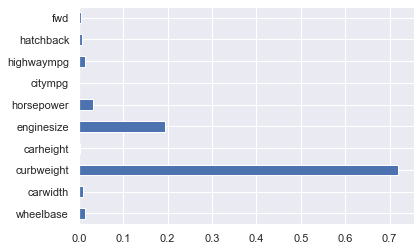

In [66]:
# Visualizing feature importance
(pd.Series(reg_tree.feature_importances_, index=selected_featuress.columns).plot(kind='barh'))

**Conclusion:** Most mportant feature according to the model is `curbweight`.

In [67]:
# Decision Tree Regression:

In [68]:
import numpy as np

class DecisionTree():
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = {}

    # A function to split the dataset to create a decision tree    
    def split(self, X, y, depth):
        n_samples, n_features = X.shape
        # To get the number of samples and features present in the dataset.
        '''We initialize some variables to store the best split information.'''
        best_sdr = -1
        # best standard deviation reduction is set to -1.
        best_feature = None
        # Storing the best feature index and the threshold value.
        best_value = None

        # Stop condition: max depth reached or not enough samples to split
        if depth == self.max_depth or n_samples < self.min_samples_split:
            return {'leaf': True, 'value': y.mean()}

        # We start to iterate through the features present in n_features variable.
        for feature in range(n_features):
            values = np.unique(X[:, feature])
            for value in values:
                left_indices = X[:, feature] < value
                left_X = X[left_indices]
                left_y = y[left_indices]
                right_X = X[~left_indices]
                right_y = y[~left_indices]

                if left_X.shape[0] == 0 or right_X.shape[0] == 0:
                    continue

                # Calculate split criterion: Sum of Squared Deviation Reduction (SDR)
                sdr = self.calculate_sdr(left_y, right_y)

                if sdr > best_sdr:
                    best_sdr = sdr
                    best_feature = feature
                    best_value = value
                    best_left_X = left_X
                    best_left_y = left_y
                    best_right_X = right_X
                    best_right_y = right_y

        # If there is no split with positive SDR, make a leaf node
        if best_feature is None:
            return {'leaf': True, 'value': y.mean()}

        # Recursively split left and right nodes
        left = self.split(best_left_X, best_left_y, depth+1)
        right = self.split(best_right_X, best_right_y, depth+1)
        return {'leaf': False, 'feature': best_feature, 'value': best_value, 'left': left, 'right': right}

    # Function to calculate the standard deviation reduction value
    def calculate_sdr(self, left_y, right_y):
        parent_std = np.std(np.concatenate((left_y, right_y)))
        left_std = np.std(left_y)
        right_std = np.std(right_y)
        n = left_y.shape[0] + right_y.shape[0]
        sdr = parent_std - ((left_y.shape[0] / n) *left_std + (right_y.shape[0] / n) * right_std)
        return sdr
    
    # Fit is the function that provides input and target values to the 'spilt' function and initializing the recursive process.
    def fit(self, X, y):
        self.tree = self.split(X, y, depth=0)
        
    # For predicting with new data points provided
    def predict(self, X):
        return np.array([self.traverse(x, self.tree) for x in X])
    
    # Function makes predictions based on the tree stored in the 'fit' function.
    def traverse(self, x, node):
        if node['leaf']:
            return node['value']

        if x[node['feature']] < node['value']:
            return self.traverse(x, node['left'])
        else:
            return self.traverse(x, node['right'])

In [69]:
X = cars.iloc[:, :-1].values
Y = cars.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [70]:
model = DecisionTree()
model.fit(X_train,Y_train)

In [71]:
y_newhat=model.predict(X_test) 

In [72]:
# Testing score

In [73]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, y_newhat))

0.15617376188860607

In [74]:
mean_squared_error(Y_test, y_newhat)

0.024390243902439025

In [75]:
# Training score

In [76]:
Y_train_new = model.predict(X_train)

In [77]:
np.sqrt(mean_squared_error(Y_train, Y_train_new))

0.0

In [78]:
mean_squared_error(Y_train, Y_train_new)

0.0

In [79]:
# Hyperparameter Tuning

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold    

In [81]:
max_depths = [1, 2, 3, 4, 5]
min_samples_splits = [2, 3, 4, 5]

def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

best_params = {}
best_params_train = {}
best_mse = float('inf')
best_mse_train = float('inf')

kf = KFold(n_splits=5, shuffle=True)

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
            # Define the decision tree regressor with current hyperparameters
            dtr = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split)
                                         
            # Fit the model to the data using k-fold cross-validation
            mse_list = []
            mse_list_train = []
            for train_idx, test_idx in kf.split(X):
                X_train, y_train = X[train_idx], Y[train_idx]
                X_test, y_test = X[test_idx], Y[test_idx]
                dtr.fit(X_train, y_train)
                y_pred = dtr.predict(X_test)
                y_train_pred = dtr.predict(X_train)
                mse = calculate_mse(y_test, y_pred)
                mse_train = calculate_mse(y_train, y_train_pred)
                mse_list.append(mse)
                mse_list_train.append(mse_train)
            mean_mse = np.mean(mse_list)
            mean_mse_train = np.mean(mse_list_train)
            # Check if this is the best result so far
            if mean_mse < best_mse:
                best_mse = mean_mse
                best_params['max_depth'] = max_depth
                best_params['min_samples_split'] = min_samples_split
                
            if mean_mse_train < best_mse_train:
                best_mse_train = mean_mse_train
                best_params_train['max_depth'] = max_depth
                best_params_train['min_samples_split'] = min_samples_split
                

In [82]:
# Print the best hyperparameters and the corresponding mean squared error
print('Best Hyperparameters:', best_params)
print('Best MSE:', best_mse)
print('Best Hyperparameters with training data:', best_params_train)
print('Best MSE on training data:', best_mse_train)

Best Hyperparameters: {'max_depth': 2, 'min_samples_split': 2}
Best MSE: 0.004878048780487805
Best Hyperparameters with training data: {'max_depth': 4, 'min_samples_split': 5}
Best MSE on training data: 0.00603807257584771
